In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 02, ASTR 596: Fundamentals of Data Science

### Gautham Narayan 
##### <gsn@illinois.edu>

## Recap

* We've done an overview of "descriptive" statistics (as opposed to inferential statistics)
* Random variables (discrete and continuous), sample estimators, covariance
    * Bayes' rule and how it follows from the axioms of probability
    * conditional probability, marginalization

* Distributions (univariate and multivariate), moments, common distributions, PDFs, CDFs
* Random variables as samples from a distribution 
* Why you should look at the samples, not just moments/summary statistics
* Comparing samples to a normal distribution (the QQ plot), identifying skewness, outliers

* The central limit theorem
* Basic visualizations of multivariate data
* Dealing with basic astronomical data types

### <center> Remember the goal is to get to <i>P(H|D).</i> </center>

### <center> What questions do you have? </center>

## The Method of Moments and Hypothesis Testing 


### The Method of Moments (Chebyshev, 1887)
We know how to estimate moments if we have an underlying description of the population - the PDF

### <center> $\mu_{n} = \int_{-\infty}^{\infty} (x-c)^{n} \cdot p(x) \cdot dx $ </center>

Generally, we do not have the PDF but have some random samples that are drawn from it.

We have been equating sample moments with population moments already

* the KDE plot with multivariate data
* estimating parameters from a multivariate sample by eye and constructing a multivariate Gaussian
* your homework...

This works when the data is simple enough to be described by some simple model. You also know when this isn't the case:

<img src="./figures/DataDino-600x455.gif" width="200">

But if it is the case...

* Assume a form for the empirical PDF $f(x; \theta)$
* Equate the sample moments with the empirical moments

In [2]:
%pylab
%matplotlib inline
import scipy.stats as st
from astropy.visualization import hist as ahist
import statsmodels.api as sm

samp_size = 10

# simulate something like the magnitudes you might measure on a detector
samp = -2.5*np.log10(st.poisson.rvs(2000, size=samp_size)) + 25

# true moments are straightforward - remember change of variables for the standard deviation
mu_true = -2.5*np.log10(2000) + 25
sig_true = np.log10(e)*2.5*np.sqrt(mu_true)/mu_true

# sample moments
mu_samp = samp.mean()
sig_samp = samp.std()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/gnarayan/miniconda3/envs/fds/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


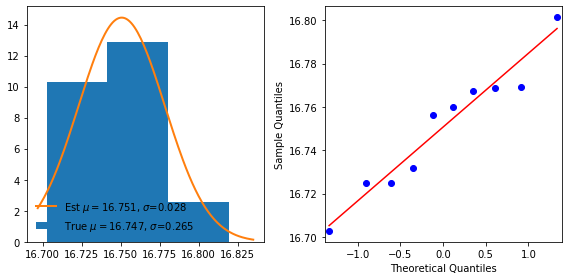

In [3]:
fig = figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ahist(samp, bins='freedman', density=True, ax=ax1,\
      label=fr'True $\mu=${mu_true:.3f}, $\sigma$={sig_true:.3f}')
xmin, xmax = ax1.get_xlim()
xval = np.arange(xmin, xmax+0.01, 0.001)
estpdf  = st.norm.pdf(xval, loc=mu_samp, scale=sig_samp)
ax1.plot(xval, estpdf, color='C1', lw=2, label=fr'Est $\mu=${mu_samp:.3f}, $\sigma$={sig_samp:.3f}')
ax1.legend(frameon=False)
sm.qqplot(samp, line='r', ax=ax2)
tight_layout()

This is closely related to the **Null Hypothesis Rejection Test** (NHRT)

* You have data drawn from some unknown population
* Assume a model for that population
    * This allows you to make a prediction for the data you have
    * "Under the null hypothesis" = if the model is a good description of the data
        * then the data should be highly probable
    * Define a test such that some observation has a very low probability of happening

* Given your data, if the low probability happened, then you can reject your model
* If it hasn't happened, your model still holds
    * but that doesn't tell you it's a good description of the data

<center> <img src='./figures/nhrt.png'> </center>
(credit: Federica Bianco, U. Delaware)

So when you hear "$x$ is a 2-$\sigma$ detection!"

* 2-$\sigma$: confidence level
* 0.05: p-value
* 95%: threshold


Unstated here is that there is an assumption of some model, typically a Gaussian.

**Nothing** here states that the model is a good description of the data at all.

Consider this from Kang et al. "Early-type Host Galaxies of Type Ia Supernovae. II. Evidence for Luminosity Evolution in Supernova Cosmology", 2020, ApJ, 889, Issue 1, id. 8

[ADS Link](https://ui.adsabs.harvard.edu/abs/2020ApJ...889....8K/abstract)
or 
[ArXiv](https://arxiv.org/abs/1912.04903)

  <center> <img src ="./figures/kang_sne_evol.png" width="800"> </center>

### Staistical sins

- hypotheses suggested by non-representative data
    - you almost always have to deal with this in real data
- looking for patterns in your data is legitimate
    - applying a hypothesis test to the same data from which a pattern emerges is not
        - randomized out-of-sample tests/cross-validation
- p is not the probability that the hypothesis is false! (remember what you are given here is the hypothesis)
- p-hacking: only reporting the hypothesis with a significant p-value but not reporting the ones without

#### Read Cohen 1994 "The Earth is Round (p < .05)" included in the directory for all the issues with hypothesis testing
    

If your sample is indeed drawn from a random distribution:

### <center> $ \left| x - \mu \right| > 3\sigma$ implies $X$ is more extreme than the distribution 0.27% of the time </center>

## In class exercise 1
### NRHT when the model isn't normal

The Universe has many processes that throw outliers into your nice curated data
(I hope you are enjoying your homework)

If you model a sample as normal, but the underlying population isn't then you are liable to flag something as significant when it isn't. 

See what difference it makes when you go from a Gaussian to a Student's t-distribution with 8 degrees of freedom:

Text(0, 0.5, 'SF(x)')

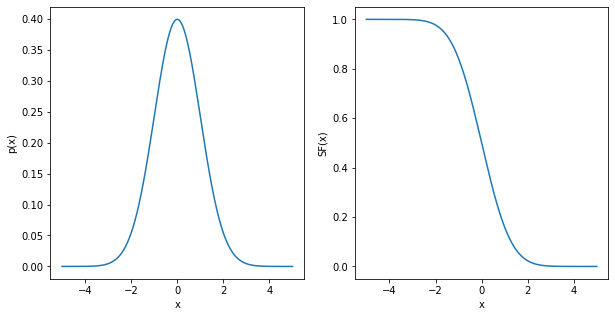

In [4]:
# your code goes here:


# You can evaluate what P(X > x) is with the survival function i.e. (1 -  CDF(X))

fig = figure(figsize=(10, 5))
x = np.arange(-5, 5.01, 0.01)
pdf = st.norm.pdf(x)
sf = st.norm.sf(x)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(x, pdf)
ax2.plot(x, sf)

ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')

ax2.set_xlabel('x')
ax2.set_ylabel('SF(x)')

# DO THIS FOR A T-DISTRIBUTION WITH Nu=8
# 

# another thing you can try is the interval function to ask what interval encloses % of the total probability
# this is better for assymetric distributions


The issue with the method of moments and classical hypothesis testing is they are not very **robust** to outliers in the data.

In [5]:
samp_size = 200
outlier_fraction1 = 0.1
outlier_fraction2 = 0.05

# simulate something like the magnitudes you might measure on a detector
samp1 = -2.5*np.log10(st.poisson.rvs(2000, size=samp_size)) + 25
samp2 = -2.5*np.log10(st.poisson.rvs(1850, size=max(int(outlier_fraction1*samp_size), 1))) + 25
samp3 = -2.5*np.log10(st.poisson.rvs(3700, size=max(int(outlier_fraction2*samp_size), 1))) + 25
samp = np.concatenate((samp1, samp2, samp3), axis=-1)
np.random.shuffle(samp)

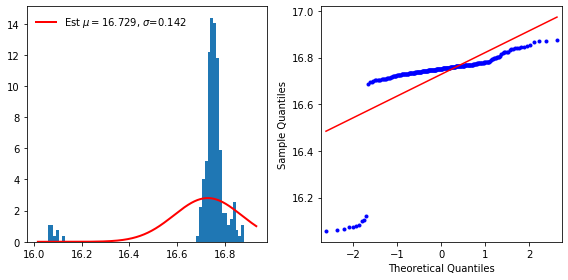

In [6]:
# sample moments
mu_samp = samp.mean()
sig_samp = samp.std()

fig = figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ahist(samp, bins='freedman', density=True, ax=ax1)
xmin, xmax = ax1.get_xlim()
xval = np.arange(xmin, xmax+0.01, 0.001)
estpdf  = st.norm.pdf(xval, loc=mu_samp, scale=sig_samp)
ax1.plot(xval, estpdf, color='r', lw=2, label=fr'Est $\mu=${mu_samp:.3f}, $\sigma$={sig_samp:.3f}')
ax1.legend(frameon=False)
sm.qqplot(samp, line='r', ax=ax2, marker='.')
tight_layout()

## In class exercise 2
### Robust Statistics - Alternative 1: Eliminating Outliers (i.e. clean your data)

In your homework, you have encountered one way to cleanup your data, using the QQ-plot.
* using a line defined through some quartiles
* using $Y = \mu + \sigma\cdot x$ 

Both of these methods are fundamentally assuming the data is normally distributed.

astropy.stats has a sigma_clip method that also assumes the data is normally distributed, but you can control around where. In particular you can use the median.

Try eliminating the outliers with it, and check if the method of moments estimator gives you something reasonable.

In [7]:
# your code goes here - don't overwrite samp

$\sigma$-clipping is probably the most widely used outlier rejection method in the astronomy literature.

However it is *ad hoc* - $\sigma$ itself is changing each clipping iteration, but you cannot know how unless you know the underlying PDF that the sample was drawn from, including the outliers.

It's also painfully slow with large quantities of data. 

## Alternative 2: L-estimators

It's useful to have some summary statistics that describe distributions, which are robust to outliers, and can be computed fast.

We assumed a form for the empirical PDF $f(x; \theta)$, and used some moments as estimators. But there are other quantities that you can get from the empirical PDF that are more robust. 

The quantile estimators we looked at in week 1 already have this behavior.

### <center> $ p = \int_{-\infty}^{x_p} f(x) dx $ </center>

### and the median: <center> $ \frac{1}{2} = \int_{-\infty}^{x_{\frac{1}{2}} } f(x) dx $ </center>

You can also define measures of the variance of the data. This was one - you've used it on your homework implicitly.

### <center> $ \text{IQR} = x_{\frac{3}{4}} - x_{\frac{1}{4}} $</center>

For a normal distribution, $\sigma = \text{IQR}/2\sqrt{2}\cdot\text{erf}^{-1}(\frac{1}{2}) \;\; (\approx1.349)$. This is another common L-estimator called the **Median Absolute Deviation**

### <center> $ \text{MAD}  = \left| x_i - x_{\frac{1}{2}} \right| $ </center>

For a normal distribution, $\sigma = 1.4826\cdot\text{MAD}$


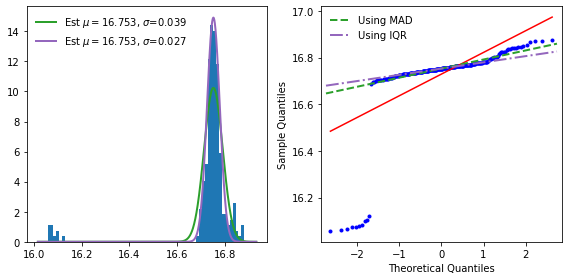

In [8]:
# if we repeat the exercise with robust estimators
median = np.median(samp)
sig_robust = 1.4826*st.median_absolute_deviation(samp)
sig_robust2 = st.iqr(samp)/1.349

fig = figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ahist(samp, bins='freedman', density=True, ax=ax1)
xmin, xmax = ax1.get_xlim()
xval = np.arange(xmin, xmax+0.01, 0.001)

# this time, instead of applying the method of moments using the sample moments, we're using the L-estimators
estpdf  = st.norm.pdf(xval, loc=median, scale=sig_robust)
estpdf2  = st.norm.pdf(xval, loc=median, scale=sig_robust2)

ax1.plot(xval, estpdf, color='C2', lw=2, label=fr'Est $\mu=${median:.3f}, $\sigma$={sig_robust:.3f}')
ax1.plot(xval, estpdf2, color='C4', lw=2, label=fr'Est $\mu=${median:.3f}, $\sigma$={sig_robust2:.3f}')
ax1.legend(frameon=False)

# and the QQ plot
sm.qqplot(samp, line='r', ax=ax2, marker='.')
nmin, nmax = ax2.get_xlim()
nvals = np.arange(nmin, nmax+0.01, 0.01)
y = median + sig_robust*nvals
y2 = median + sig_robust2*nvals
ax2.plot(nvals, y, '--', color='C2', lw=2, label='Using MAD')
ax2.plot(nvals, y2, '-.', color='C4', lw=2, label='Using IQR')
ax2.legend(frameon=False)
tight_layout()

L-estimators work well when:
   * the data has outliers
   * the data has no (or at least very small) uncertainties associated with it
       * notice that we computed them from the sample, but made no mention/use of sample uncertainties

## Alternative 3: M-estimators

* As before, assume a form for the empirical PDF $f(x; \theta)$
* Define a **loss function** $\rho(u)$ for some quantity $u$ e.g. $x - \mu$
* Minimize this loss over the sample
    * $\sum_{i=1}^{N} \rho(u_i) $ 

### OK, so what the heck is a loss function now?

If $(x_1, x_2..., x_N)$ is a set of i.i.d random variables from some distribution p(x) which we don't know, but want to estimate. 

What we're trying to do is to build an estimator for moments out of the sample.

If we define

## <center> $ \rho(x, \theta=\mu) = \frac{(x - \mu)^2}{2} $ </center>

How do you go about minimizing this with respect to $\theta$?

For $u = x-\mu$, there's several potential cost functions:

### <center> $\rho(u) = u^2$ </center>
    
is an old friend to all of you. It's the **sum of squared residuals** or what we sometimes call the $L_2$ norm.

Of the loss functions, this is the nicest behaved - it's **convex** and **differentiable**

Differentiability implies continuity. Continuity does not guarantee differentiability. 

Most M-estimators aren't nicely differentiable, but often have other properties - such as resistance to outliers.

You've already seen another loss function:

### <center> $\rho(u) = \left|u \right|$ </center>

This is the sum of absolute residuals and is related directly to the MAD. You might see it called the $L_1$ norm, particularly in machine learning literature. 

### Other loss functions you'll see

<center> <img src="./figures/loss_functions.jpg"> </center>

### M-estimators and The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, for the Gaussian distribution probablity of getting a specific value of $x$ is given by:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

### The Likelihood Function

If we want to know the total probability of our *entire* data set (as opposed to one measurement) then we must compute the *product* of all the individual probabilities:
$$L \equiv p(\{x_i\}|H(\theta)) = \prod_{i=1}^n p(x_i|H(\theta)),$$
where $H$ refers to the *hypothesis* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. In words, this is ***the probability of the data given the model parameters***. 

(Note we're assuming the individual measurements are independent of each other.)

If we consider $L$ as a function of the model parameters, we refer to it as the ***likelihood of the model parameters, given the observed data***. 

Note that while the components of $L$ may be normalized pdfs, their product is not.  Also the product can be very small, so we often take the log of $L$.

We can write this out as:
$$L = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

This can simplify to
$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

i.e. we have done this: $$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$

**NOTE**

The Likelihood function is the joint **probability density** of all measurements. For each measurment we have a probablity density. These probability densities have **units**. They are the reciprical of the units of the measurement (as the integrated probability does not have units but the interval over which we are integrating does).

The argument of the exponential is just

$$\exp \left(-\frac{\chi^2}{2}\right).$$

where, for our Gaussian distribution
$$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So, maximizing the likelihood is the same as minimizing $\chi^2$.


i.e. maximum likelihood estimation - and $\chi^2$ minimization are just a special case of M-estimators. 

- Cramer Rao bound
- Likelihood ratio
- AIC/BIC